# <a id='toc1_'></a>[analyze data](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [analyze data](#toc1_)    
  - [short dataset](#toc1_1_)    
  - [condensed data](#toc1_2_)    
  - [interactive](#toc1_3_)    
  - [analysis showcase 📈](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import os
import pandas as pd
from pathlib import Path
from pandas_plots import tbl, pls, hlp
import duckdb as ddb

hlp.show_package_version(["pygwalker"])

os.environ["THEME"]="light"

dir_data_in=Path("../data/in")
dir_data_out=Path("../data/out")

con = ddb.connect()

🐍 3.12.2 | 📦 pygwalker: 0.4.9.13 | 📦 pandas: 2.2.3 | 📦 numpy: 1.26.4 | 📦 duckdb: 1.2.0 | 📦 pandas-plots: 0.12.14 | 📦 connection_helper: 0.8.13


## <a id='toc1_1_'></a>[short dataset](#toc0_)
- all empty columns have been removed

In [2]:
# df_csv_short = pd.read_csv(
#     dir_data_out / "df_csv_short.csv", sep=";", encoding="utf-8-sig"
# )

# tbl.describe_df(
#     df_csv_short,
#     "short",
#     top_n_uniques=5,
#     top_n_chars_in_index=5,
#     use_plot=True,
#     top_n_chars_in_columns=20,
#     use_missing=True,
#     fig_cols=6,
# )

## <a id='toc1_2_'></a>[condensed data](#toc0_)
- defined columns have been transformed

🔵 *** df: condensed ***
🟣 shape: (195, 70) columns: ['Participant ID' '[01.01] CTCAE ' '[01.02] Datum_AE'
 '[01.03] Sportassoziation' '[02.01] Datum_Aufnahme' '[02.02] Art'
 '[02.03] Auslöser' '[02.04] Körperteil' '[03.01.01] Schmerzen_Intensität'
 '[03.01.02] Schmerzen_Dauer' '[03.01] Schmerzen_Folge'
 '[03.02.01] Krankenhaus_Intensität ' '[03.02.02] Krankenhaus_Dauer'
 '[03.02] Krankenhaus_Folge' '[03.03.01] Med_Weiterbehandlung_Intensität'
 '[03.03.02] Med_Weiterbehandlung_Dauer'
 '[03.03] Med_Weiterbehandlung_Folge'
 '[03.04.01] Therapieprotokoll_Intensität'
 '[03.04.02] Therapieprotokoll_Dauer' '[03.04] Therapieprotokoll_Folge'
 '[03.05.01] Lebensnotwendige_Intenvention_Intensität'
 '[03.05.02] Folgen - Wie oft wurde die lebensnotwendige Intervention wiederholt?'
 '[03.05] Lebensnotwendige_Intenvention_Folge'
 '[03.06.01] Pflege_Intensität' '[03.06.02] Pflege_Dauer'
 '[03.06] Pflege_Folge' '[03.07.01] Medikamente_Dauer'
 '[03.07.02] Medikamente_Intensität' '[03.07] Medikamente_Fol

,Participant ID,[01.01] CTCAE,[01.02] Datum_AE,[01.03] Sportassoziation,[02.01] Datum_Aufnahme,[02.02] Art,[02.03] Auslöser,[02.04] Körperteil,[03.01.01] Schmerzen_Intensität,[03.01.02] Schmerzen_Dauer,...,[05.04] Online,[05.05] Testung,[05.06] Setting,[05.07] Motorik,[05.08] Hälfte,[05.09] Trainingszustand,[06.01] Freitext_Auslöser,[07.01] Standort,[07.04] Freitext_Medikaments,[07.07] Freitext_Observieren
0,3,2,Das AE war vor dem Sport bereits vorhanden und...,No,2022-10-01,Übelkeit/ Erbrechen,Physische Belastung|Med. Therapie,Internistisch,NaN,<NA>,...,No,No,Klinikflur,Koordination,2. Hälfte,2 Durchschnittlich,Beim moderaten Tischtennisspielen wurde der Pa...,Essen,nan,<NA>
1,4,1,Das AE ist neu aufgetreten.,Yes,2022-10-01,Schmerzen,Koordinationsprobleme,Rücken|Gesäß,2.0,Schmerzen am gleichen Tag,...,No,No,Klinikflur,Koordination,1. Hälfte,1 Gut,Luftballonspiel im Stehen; Kind hat sich gestr...,Essen,nan,<NA>
2,5,2,Das AE war vor dem Sport bereits vorhanden und...,No,2022-11-01,Kreislaufprobleme,Med. Therapie,Internistisch,NaN,<NA>,...,No,No,Pat.-Zimmer,Koordination,2. Hälfte,3 Mäßig|5 Anmerkung,Beim leichter Mobilisation und Aktivierung hat...,Essen,nan,<NA>


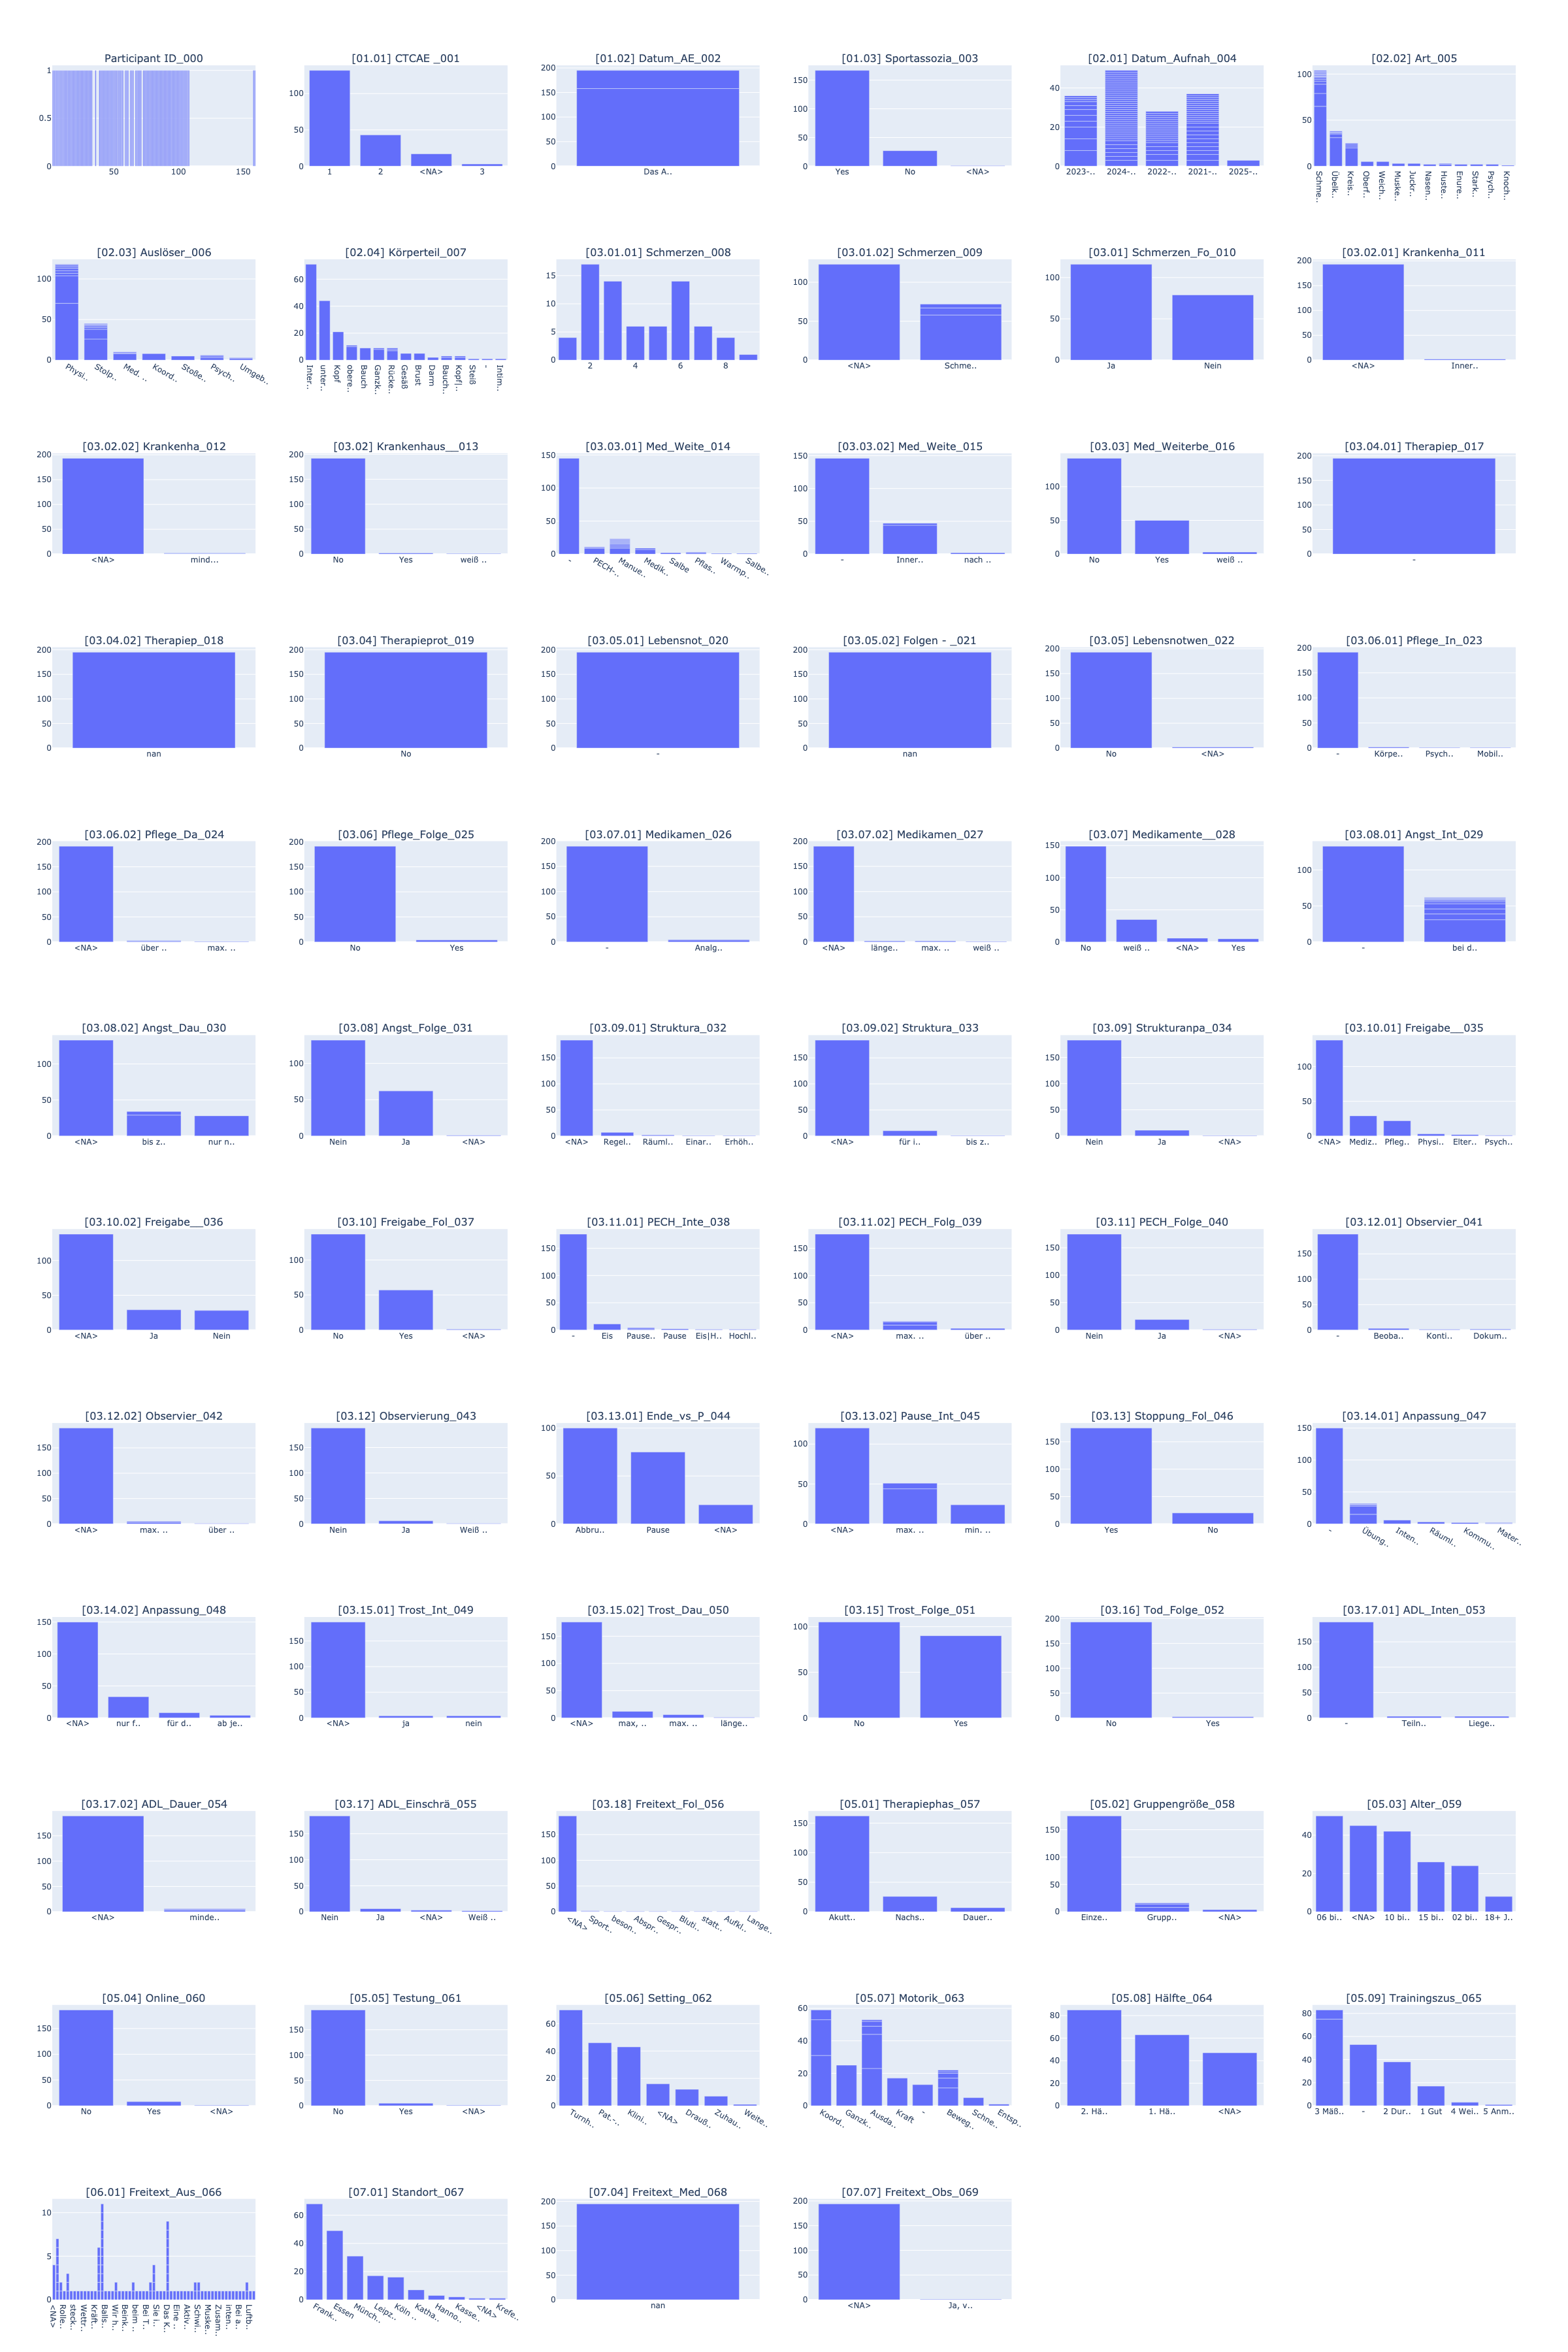

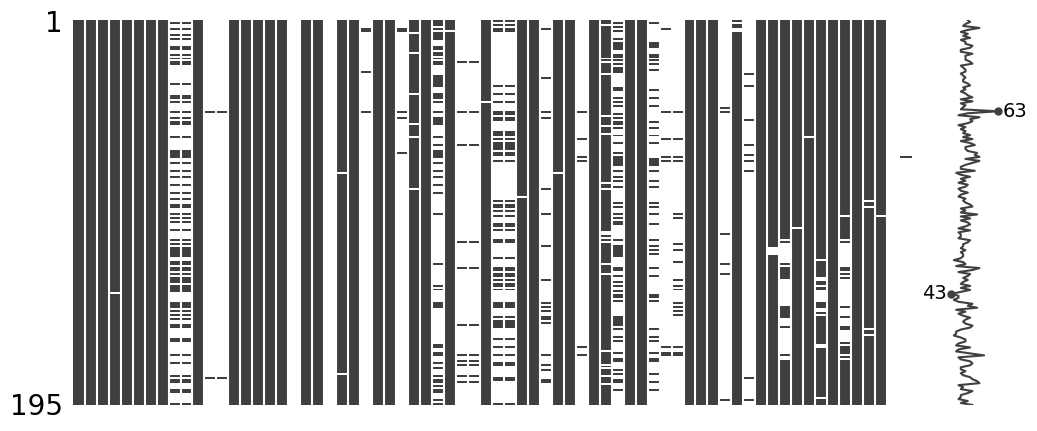

In [3]:
df_csv_condensed = (
    pd.read_csv(
        dir_data_out / "df_csv_condensed.csv",
        sep=";",
        encoding="utf-8-sig",
        index_col=None,
    ))

# * mark columns that should be str instead of float, fuzzy
col_int = hlp.find_cols(all_cols=df_csv_condensed.columns, stubs=["[01.01]"])

# * 
df_csv_condensed = (df_csv_condensed
        .astype({col_int[0]:"Int64"})
        .astype({col_int[0]:str})
)

tbl.describe_df(
    df_csv_condensed.iloc[:, :],
    "condensed",
    top_n_uniques=3,
    top_n_chars_in_index=5,
    use_plot=True,
    top_n_chars_in_columns=20,
    use_missing=True,
    fig_cols=6,
)

## <a id='toc1_3_'></a>[interactive](#toc0_)

In [4]:
if True:
    import pygwalker as pyg 
    
    _df = df_csv_condensed.astype(str)#.sort_index(axis=1)

    _=pyg.walk(
        dataset=_df,
        appearance=os.getenv("THEME"),
        kernel_computation=True,
    )

Box(children=(HTML(value='\n<div id="ifr-pyg-00062f6f40ea30d4aMvxDXQ9UAJwdSs4" style="height: auto">\n    <hea…

## <a id='toc1_4_'></a>[analysis showcase 📈](#toc0_)

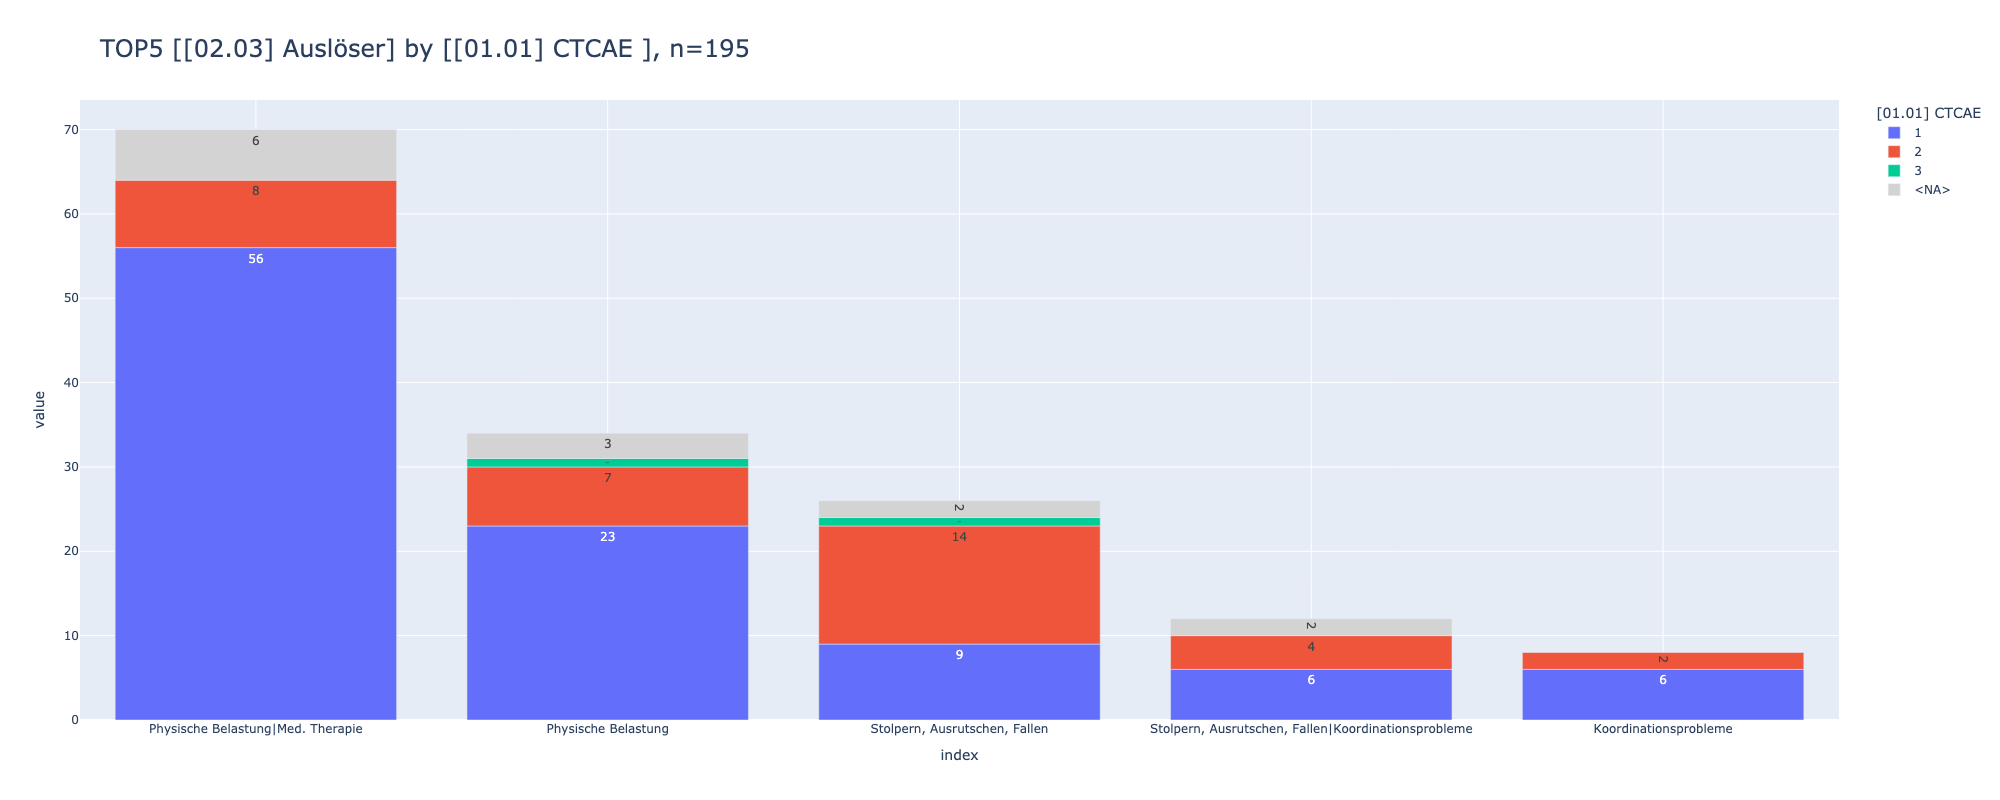

In [5]:
_col = hlp.find_cols(all_cols=df_csv_condensed.columns, stubs=["[01.01]", "[02.03]"])
_df = df_csv_condensed[_col]
_df
_ = pls.plot_stacked_bars(
    _df,
    swap=True,
    # png_path="../docs/img/trigger_ctcae.png",
    sort_values_index=True,
    height=800,
    top_n_index=5,
)

## descriptive stats

In [6]:
stubs = (
        "[01.01]",
        "[01.02]",
        "[01.03]",
        "[02.02]",
        "[02.03]",
        "[02.04]",
        "[03.02]",
        "[03.03]",
        "[03.04]",
        "[03.06]",
        "[03.07]",
        "[03.08]",
        "[03.09]",
        "[03.10]",
        "[03.10.01]",
        "[03.11]",
        "[03.11.02]",
        "[03.12]",
        "[03.13]",
        "[03.13.01]",
        "[03.13.02]",
        "[03.14]",
        "[03.14.01]",
        "[03.14.02]",
        "[03.15]",
        "[03.17]",
        "[05.01]",
        "[05.02]",
        "[05.03]",
        "[05.04]",
        "[05.05]",
        "[05.06]",
        "[05.07]",
        "[05.08]",
        "[05.09]",
        )
cols = hlp.find_cols(all_cols=df_csv_condensed.columns, stubs=stubs)
cols

['[01.01] CTCAE ',
 '[01.02] Datum_AE',
 '[01.03] Sportassoziation',
 '[02.02] Art',
 '[02.03] Auslöser',
 '[02.04] Körperteil',
 '[03.02] Krankenhaus_Folge',
 '[03.03] Med_Weiterbehandlung_Folge',
 '[03.04] Therapieprotokoll_Folge',
 '[03.06] Pflege_Folge',
 '[03.07] Medikamente_Folge',
 '[03.08] Angst_Folge',
 '[03.09] Strukturanpassung_Folge',
 '[03.10.01] Freigabe_OK',
 '[03.10] Freigabe_Folge',
 '[03.11.02] PECH_Folge',
 '[03.11] PECH_Folge',
 '[03.12] Observierung_Folge',
 '[03.13.01] Ende_vs_Pause',
 '[03.13.02] Pause_Intensität',
 '[03.13] Stoppung_Folge',
 '[03.14.01] Anpassung_Intensität',
 '[03.14.02] Anpassung_Dauer',
 '[03.15] Trost_Folge',
 '[03.17] ADL_Einschränkungen',
 '[05.01] Therapiephase',
 '[05.02] Gruppengröße',
 '[05.03] Alter',
 '[05.04] Online',
 '[05.05] Testung',
 '[05.06] Setting',
 '[05.07] Motorik',
 '[05.08] Hälfte',
 '[05.09] Trainingszustand ']

In [7]:
from tabulate import tabulate
n = len(df_csv_condensed)

# df_all = pd.DataFrame()
for col in cols:
    if df_csv_condensed[col].dtype.kind in ("O"):
        df = (df_csv_condensed[col]
            .str.split("|")
            .explode()
            .value_counts()
            .to_frame()
            .rename(columns={"count": "cnt"})
            .assign(pct=lambda x: x["cnt"] / n)
            .round({"pct": 2})  # Round 'pct' column to 2 decimal places
        )
        # print(tabulate(df, headers="keys", tablefmt="pipe", showindex=True))
        # print(col)
        con.from_df(df.reset_index()).show()
        # df_ = df.reset_index().assign(col=col).rename(columns={col: "value"})[["col", "value", "cnt", "pct"]]
        # df_all = pd.concat([df_all, df_], axis=0)

┌────────────────┬───────┬────────┐
│ [01.01] CTCAE  │  cnt  │  pct   │
│    varchar     │ int64 │ double │
├────────────────┼───────┼────────┤
│ 1              │   132 │   0.68 │
│ 2              │    43 │   0.22 │
│ <NA>           │    17 │   0.09 │
│ 3              │     3 │   0.02 │
└────────────────┴───────┴────────┘

┌────────────────────────────────────────────────────────────────────┬───────┬────────┐
│                          [01.02] Datum_AE                          │  cnt  │  pct   │
│                              varchar                               │ int64 │ double │
├────────────────────────────────────────────────────────────────────┼───────┼────────┤
│ Das AE ist neu aufgetreten.                                        │   158 │   0.81 │
│ Das AE war vor dem Sport bereits vorhanden und hat sich verstärkt. │    37 │   0.19 │
└────────────────────────────────────────────────────────────────────┴───────┴────────┘

┌──────────────────────────┬───────┬────────┐
│ [01.03] Sp